In [49]:
# Imports
from clases.red_rddas_model import RedRddasModel
from clases.experiment_model import ExperimentModel

import ray
import time
import pandas as pd
import numpy as np
import pickle  # library to serialization object

from itertools import product  # generate combinations of numbers

# Ray Configurations
# ray.shutdown()
#runtime_env = {"working_dir": "/home/reynaldo/Documents/RESEARCH/SynEstRDDA", "pip": ["requests", "pendulum==2.1.2"]}
#ray.init(address='ray://172.17.163.253:10001', runtime_env=runtime_env, log_to_driver=False)
# ray.init(address='ray://172.17.163.244:10001', runtime_env=runtime_env , log_to_driver=False, num_cpus=12)
# ray.init(log_to_driver=False, num_cpus=12)

In [50]:
# Parameters
n_rdds = 3
n_of_variables_rdda = 2
n_of_signals_rdda = 2
n_exit_variables = 2
n_clauses_function = 2
type_network = "ALEATORY"

# Generate the RDDA
o_rdda = RedRddasModel(number_of_rddas=n_rdds,number_of_variables_rdda=n_of_variables_rdda,number_of_signals_rdda=n_of_signals_rdda,number_exit_variables=n_exit_variables,number_clauses_function=n_clauses_function)

# Show the RDDA
o_rdda.show_description()

# Generate the RDDs
o_rdda.generate_rddas(type_network=type_network)

# Show the list of RDDs
o_rdda.show_rdds()

# Find the attractors by RDD
o_rdda = RedRddasModel.find_attractors_rddas(o_rdda)

# Show the attractors of the RDDs by Signal
o_rdda.show_attractors()

# Calculation the Attractor Pairs
o_rdda = RedRddasModel.calculation_compatible_pairs(o_rdda)

# Show the list of attractor pairs
o_rdda.show_attractor_pairs()

# Assembly the attractor fields
l_partial_paths = o_rdda.assembly_attractor_fields_pruning(o_rdda)

# Show the list of attractor fields
o_rdda.show_attractor_fields_detail()

NETWORK RDDA DESCRIPTION
Number of RDDs : 3
Number of variables by RDD : 2
Number of coupling signals by RDD : 2
Maximum number of exit variables by signal : 3
Maximum number of clauses by function : 3
List of RDDs of the RDDA
RDDA DESCRIPTION
Name of RDDA : 1
List of intern variables : 
[1, 2]
List of coupling signals : 
---------------
Network Input : 1
Network Output : 3
Variables : [6, 5]
Name Variable : 7
Coupling Function :  6 ∨ 5 
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
---------------
Network Input : 1
Network Output : 2
Variables : [4, 3]
Name Variable : 8
Coupling Function :  4 ∨ 3 
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
Description of Variables
V: 1 CNF :[[7, 2, 1]]
V: 2 CNF :[[8, 2, 7]]
RDDA DESCRIPTION
Name of RDDA : 2
List of intern variables : 
[3, 4]
List of coupling signals : 
---------------
Network Input : 2
Network Output : 1
Variables : [1, 2]
Name Variable : 9
Coupling Function :  1 ∨ 2 
Truth Ta

In [51]:
# # Lucas Code
# # Tree pruning in the Assembly of attractor fields
# # imports
# import matplotlib.pyplot as plt
# import networkx as nx
# import pydot
# from networkx.drawing.nx_pydot import graphviz_layout
# import numpy as np
#
# # Create Dictionary
# d_pairs = {}
# v_key = 1
# for v_pair in o_rdda.list_attractors_pairs:
#     d_pairs[v_key] = v_pair
#     v_key = v_key + 1
#
# # Show the dictionary and the
# for v_key, v_value in d_pairs.items():
#     print(v_key, ":", v_value)
#
# # List all the partial paths in the assembly attractor fields method
# l_path_edge = []
# for l_path in l_partial_paths:
#     for path in l_path:
#         l_path_edge.append(path)
#
# # fill the edges
# l_edges_dict = []
# v_edge_ = np.array([np.apply_along_axis(lambda args : [complex(*args)], 1, item) for item in [np.array(value)[-2:] for value in l_path_edge]]).reshape(len(l_path_edge),2)
# v_indexes_ = np.array([value[0]+1j*value[1] for value in d_pairs.values()])
# l_edges_dict = np.asarray([np.asarray([np.where(v_indexes_ == v_edge_item) for v_edge_item in v_edge_[:,j]],dtype=object).reshape(v_edge_[:,0].size) for j in range(2)]).T.tolist()
# l_edges_dict

In [52]:
# Tree pruning in the Assembly of attractor fields
# imports
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

# Create Dictionary
d_pairs = {}
v_key = 1
for v_pair in o_rdda.list_attractors_pairs:
    d_pairs[v_key] = v_pair
    v_key = v_key + 1

# Show the dictionary and the
for v_key, v_value in d_pairs.items():
    print(v_key, ":", v_value)

# List all the partial paths in the assembly attractor fields method
l_path_edge = []
for l_path in l_partial_paths:
    for path in l_path:
        # print(path)
        # select the final edges
        l_path_edge.append(path[-2:])
        # print(path[-2:])

# fill the edges with dict
l_edges_dict = []
for v_edge in l_path_edge:
    v_edge_dict = []
    for key, value in d_pairs.items():
        if value == v_edge[0]:
            v_edge_dict.append(key)
            # print(value)
            # print(v_edge[0])
            # print(key)
    for key, value in d_pairs.items():
        if value == v_edge[1]:
            v_edge_dict.append(key)
            # print(value)
            # print(v_edge[1])
            # print(key)
    l_edges_dict.append(v_edge_dict)
print(l_edges_dict)

1 : [0, 15]
2 : [1, 15]
3 : [2, 15]
4 : [3, 15]
5 : [4, 16]
6 : [4, 17]
7 : [4, 18]
8 : [4, 19]
9 : [4, 20]
10 : [5, 16]
11 : [5, 17]
12 : [5, 18]
13 : [5, 19]
14 : [5, 20]
15 : [0, 7]
16 : [0, 9]
17 : [0, 12]
18 : [1, 7]
19 : [1, 9]
20 : [1, 12]
21 : [2, 7]
22 : [2, 9]
23 : [2, 12]
24 : [3, 6]
25 : [3, 8]
26 : [3, 10]
27 : [3, 11]
28 : [3, 13]
29 : [3, 14]
30 : [4, 7]
31 : [4, 9]
32 : [4, 12]
33 : [5, 6]
34 : [5, 8]
35 : [5, 10]
36 : [5, 11]
37 : [5, 13]
38 : [5, 14]
39 : [6, 1]
40 : [7, 1]
41 : [8, 1]
42 : [9, 1]
43 : [10, 1]
44 : [11, 0]
45 : [11, 2]
46 : [11, 3]
47 : [11, 4]
48 : [11, 5]
49 : [12, 0]
50 : [12, 2]
51 : [12, 3]
52 : [12, 4]
53 : [12, 5]
54 : [13, 0]
55 : [13, 2]
56 : [13, 3]
57 : [13, 4]
58 : [13, 5]
59 : [14, 0]
60 : [14, 2]
61 : [14, 3]
62 : [14, 4]
63 : [14, 5]
64 : [6, 15]
65 : [7, 15]
66 : [8, 15]
67 : [9, 16]
68 : [9, 17]
69 : [9, 18]
70 : [9, 19]
71 : [9, 20]
72 : [10, 16]
73 : [10, 17]
74 : [10, 18]
75 : [10, 19]
76 : [10, 20]
77 : [11, 15]
78 : [12, 15]
79 :

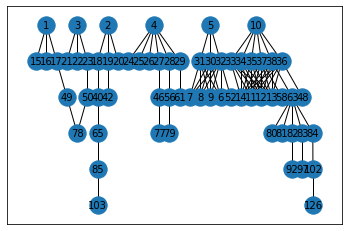

<Figure size 1.08e+06x540000 with 0 Axes>

In [53]:
# Tree pruning in the Assembly of attractor fields
# imports
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

# Generate the graph with the paths
T = nx.Graph()
# T.add_nodes_from(d_pairs.keys())
T.add_edges_from(l_edges_dict)

# Generate the Layout with dot
pos = graphviz_layout(T, prog="dot")
# Fix the position problem, string to int
aux_pos ={}
for key in pos.keys():
    aux_pos[int(key)] = pos[key]
pos = aux_pos
# Generate the graph with the data an information
nx.draw_networkx(T, pos, font_size=10)
# Show the graph with parameters
plt.figure(figsize=(1200,600), dpi=900)
plt.show()

# Generate full tree for enumerate method

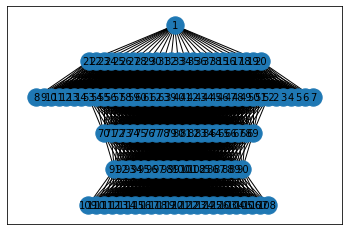

<Figure size 1.08e+06x540000 with 0 Axes>

In [54]:
# Generate the edges
l_aux = []
v_begin = 1
for element in o_rdda.list_signal_pairs:
    l_aux.append(list(range(v_begin , v_begin + len(element))))
    v_begin = v_begin + len(element)
# for element in l_aux:
#     print(element)

l_path_edge = []
for v_index in range(0,len(l_aux)-1):
    l_path_edge = l_path_edge + list(product(l_aux[v_index],l_aux[v_index+1]))
    # print(l_path_edge)

# Generate the graph with the paths
T = nx.Graph()
T.add_edges_from(l_path_edge)

# Generate the Layout with dot
pos = graphviz_layout(T, prog="dot")
# Fix the position problem, string to int
aux_pos ={}
for key in pos.keys():
    aux_pos[int(key)] = pos[key]
pos = aux_pos
# Generate the graph with the data an information
nx.draw_networkx(T, pos, font_size=10)
# Show the graph with parameters
plt.figure(figsize=(1200,600), dpi=900)
plt.show()